In [6]:
#down that .zip file and extract it
import requests
import zipfile
import io
import os
from collections import defaultdict
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

labels_dir="/home/rishabh.mondal/AISG_Assignment_1/labels/labels_native"
images_dir = "/home/rishabh.mondal/AISG_Assignment_1/image_chips_native" 

#### What method was used to compute the area (in meters) for a single instance?



x_center_pixel = x_center * 416
y_center_pixel = y_center * 416
width_pixel = x_width * 416
height_pixel = y_width * 416

because the native images are 416*416 pixels.

To convert to real-world meter values, we use the dataset's provided geotransform ie, 1 pixel is equivalent to 0.31 meters. Hence:
width_meters = width_pixel * 0.31
height_meters = height_pixel * 0.31
area_meters = width_meters * height_meters



#### What is the mean area and standard deviation?



=== Solar Panels per Image ===

=== Dataset Statistics ===
   Total Solar Panel Instances  Mean Area (m²)  Std Dev of Area (m²)  \
0                        29625      191.517828            630.700336   

   Min Area (m²)  Max Area (m²)  
0         1.0571     12177.4076  

✅ Statistics saved to 'solar_panel_statistics.csv'


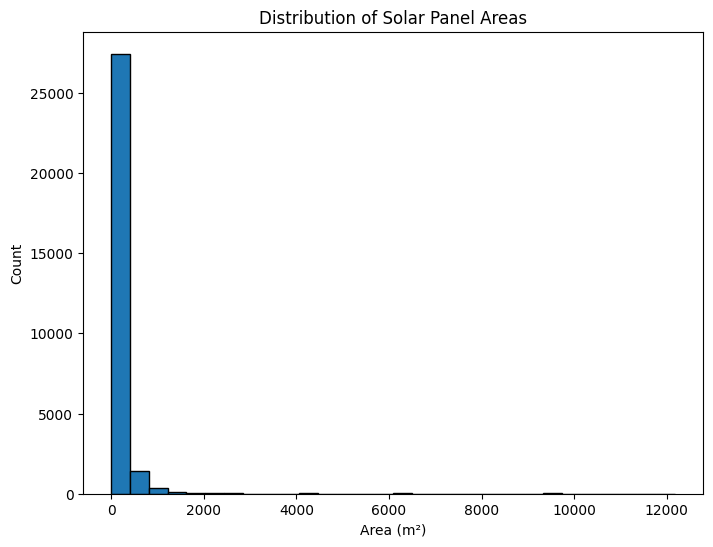

In [8]:
# List all .txt label files
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Initialize statistics
total_solar_panels = 0
label_counts = []  # Stores the number of labels per image
panel_areas = []  # Stores area of panels in square meters

resolution = 0.31  # 31 cm per pixel
image_size = 416  # Image size (YOLO format assumes square images)

# Process each label file
print("\n=== Solar Panels per Image ===")
for label_file in label_files:
    label_path = os.path.join(labels_dir, label_file)
    
    with open(label_path, "r") as f:
        lines = f.readlines()
    
    num_panels = len(lines)  # Count number of solar panels in the image
    total_solar_panels += num_panels
    label_counts.append(num_panels)

    # print(f"{label_file}: {num_panels} solar panels")  # Print per-image count

    # Compute areas
    for line in lines:
        parts = line.strip().split()
        _, _, _, width, height = map(float, parts)  # YOLO format: class x_center y_center width height
        panel_area = (width * image_size * resolution) * (height * image_size * resolution)  # Convert to m²
        panel_areas.append(panel_area)

# Compute statistics
mean_area = np.mean(panel_areas)
std_area = np.std(panel_areas)

# Prepare data for display
dataset_stats = {
    "Total Solar Panel Instances": total_solar_panels,
    "Mean Area (m²)": mean_area,
    "Std Dev of Area (m²)": std_area,
    "Min Area (m²)": np.min(panel_areas),
    "Max Area (m²)": np.max(panel_areas),
}

# Convert to DataFrame for easy viewing & saving
dataset_stats_df = pd.DataFrame([dataset_stats])

# Print dataset statistics
print("\n=== Dataset Statistics ===")
print(dataset_stats_df)

# Save dataset statistics to CSV file
dataset_stats_df.to_csv("solar_panel_statistics.csv", index=False)
print("\n✅ Statistics saved to 'solar_panel_statistics.csv'")

# Plot histogram of solar panel areas
plt.figure(figsize=(8, 6))
plt.hist(panel_areas, bins=30, edgecolor="black")
plt.xlabel("Area (m²)")
plt.ylabel("Count")
plt.title("Distribution of Solar Panel Areas")
plt.show()

#### Upon plotting the histogram, we observe that most solar panels have areas around 200 sq meters, with the mean being 191.52 sq meters and std being 630.7 sq meters
